# ***¿Qué patrones podemos encontrar sobre los costos de atención médica para los fumadores?***


Esta lectura se centrará en un resumen de los fundamentos ya vistos para un mayor análisis de datos. El estudio más avanzado del análisis de datos (como la prueba e inferencia de hipótesis, el modelado predictivo y el aprendizaje automático) a menudo también requiere algunos antecedentes *teóricos*, en los que trabajamos con abstracciones de la verdad que no están completamente ligadas por los datos que tenemos. Esta lectura abordará ambos.


## ***Introducción***

**Contexto empresarial.** Es empleado de una compañía de seguros de salud. Su empleador quiere comprender mejor cómo su competencia ajusta los cargos para los fumadores. Se le ha pedido que investigue algunos datos históricos de esta empresa para aclarar las características de los fumadores como parte de este proyecto.

**Problema comercial.** Su gerente le ha pedido que responda la siguiente pregunta: **"¿Cuál es el perfil de pago, personal y regional de un fumador?"**

**Contexto analítico.** Los datos relevantes son un archivo CSV público llamado `fumadores.csv`, que contiene información sobre varias características que pueden afectar los cargos del seguro de salud.

En esta lectura, utilizará lo que sabe sobre estadísticas básicas, junto con Python y módulos de gráficos relevantes. Se centrará en asegurarse de haber elegido las métricas y los gráficos apropiados para transmitir sus observaciones.

In [1]:
## Protocolo de módulos

import pandas            as pd            ## Manipulación de dataset.
import numpy             as np            ## Manipulación numérica y matricial
import matplotlib.pyplot as plt           ## Librería gráfica.
import seaborn           as sns           ## Librería gráfica.
import warnings                           ## Manejo de warnings        
##
warnings.filterwarnings("ignore")         ## Ignorar los warnings
plt.style.use("ggplot")                   ## Estilo para los plots.

## ***Cargue del dataset.***

Carguemos el dataset de los seguro de salud en el repositorio del curso y con el mobre `fumadores.csv`. El conjunto de datos consta de las siguientes features:

* `edad:` la edad de la persona, en años.
* `sexo:` hombre o mujer.
* `bmi:` el Índice de Masa Corporal (`bmi`) de la persona.
* `hijos:` el número de hijos que tiene la persona.
* `fumador:` si la persona es fumadora o no.
* `region:` `nor_este`, `nor_oeste`, `sur_este`, `sur_oeste`, en los Estados Unidos.
* `prima:` los cargos totales del seguro para esa persona

In [2]:
url_base = "https://raw.githubusercontent.com/lacamposm/Fundamentos_Analitica/main/data/"
data_fumadores = "fumadores.csv"
df = pd.read_csv(url_base + data_fumadores)
df.head()

,edad,sexo,bmi,hijos,fumador,region,prima
0,19,mujer,27.900,0,si,sur_oeste,16884.92400
1,18,hombre,33.770,1,no,sur_este,1725.55230
2,28,hombre,33.000,3,no,sur_este,4449.46200
3,33,hombre,22.705,0,no,nor_oeste,21984.47061
4,32,hombre,28.880,0,no,nor_oeste,3866.85520


Usemos el método `info()` para identificar los tipos de variables en el conjunto de datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   edad     1338 non-null   int64  
 1   sexo     1338 non-null   object 
 2   bmi      1338 non-null   float64
 3   hijos    1338 non-null   int64  
 4   fumador  1338 non-null   object 
 5   region   1338 non-null   object 
 6   prima    1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
hijos,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
prima,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
df.describe(include = ["O"]).T

,count,unique,top,freq
sexo,1338,2,hombre,676
fumador,1338,2,no,1064
region,1338,4,sur_este,364


Podemos resumir las feature de la siguiente manera:

<center>

| **Tipo**       | **Columna**         |
|----------------|---------------------|
| **Continua**   | bmi, prima          |
| **Discreta**   | edad, hijos         |
| **Nominal**    | sexo, fumador, region |
| **Ordinal**    |                     |

</center>

## ***Estadísticas de resumen para cada variable.***


Nuestro problema comercial original: queremos determinar el perfil de pago, personal y regional de los fumadores en los EE.UU. Debemos mirar **resumen de estadísticas** de datos sobre fumadores; por ejemplo, la media, la mediana y la moda de un conjunto de datos. Las tres son medidas de tendencia central, es decir, nos dan una idea de cómo se ve el elemento típico (más central) en un conjunto de datos para una variable determinada. 

#### ***Ejercicio 1:***

Usa los métodos `mean()`, `mode()`, `median()` y `groupby()` para responder las siguientes preguntas:

1. ¿Cuál es la prima media de todos los casos?
2. ¿La tarifa media para las personas que fuman es mayor que la de los no fumadores? ¿Cuál es la diferencia porcentual?
3. ¿Fumar es más frecuente en hombres o mujeres dentro del dataset?
4. ¿Cuál es la mediana de la prima para los hombres fumadores en comparación con las mujeres fumadoras? ¿Cuál es la diferencia porcentual?

**Respuesta.** Una posible respuesta es:

In [6]:
## Celda de código para probar.
df["prima"].mean()

13270.422265141257

In [7]:
df.mean().loc["prima"]

13270.422265141257

In [8]:
## Celda de código para probar.
means_fumar = df.groupby(by = ["fumador"])["prima"].mean()
means_fumar

fumador
no     8434.268298
si    32050.231832
Name: prima, dtype: float64

In [9]:
## Una opción para obtener los valores.
means_fumar.loc["si"]  ## Media de los que SI fuman.
means_fumar.loc["no"]  ## Media de los que NO fuman.

8434.268297856202

In [10]:
## Celda de código para probar.
((32050.231832-8434.268298)/8434.268298)*100

280.0001458288919

In [11]:
## Celda de código para probar.
df.groupby(["sexo"])["fumador"].value_counts()

sexo    fumador
hombre  no         517
        si         159
mujer   no         547
        si         115
Name: fumador, dtype: int64

In [12]:
mask = (df["fumador"] == "si")          ## Filtramos la información.
df[mask]["sexo"].mode()
## Fumar es más frecuente en hombres en este dataset.

0    hombre
dtype: object

In [13]:
df[mask].groupby(by = ["sexo"])["prima"].median()

sexo
hombre    36085.2190
mujer     28950.4692
Name: prima, dtype: float64

Deje sus conclusiones acá:

Los puntos de datos individuales reales no están todos ubicados en la media, la mediana o la moda, sino que están *distribuidos alrededor de ellos*, es decir, muestran **variabilidad**.

#### ***Ejercicio 2:***

Algunos aspectos de la variabilidad de los cargos de seguro que pagan los fumadores:

1. ¿Cuál es la diferencia entre los cargos más altos y más bajos que pagan los fumadores?
2. ¿Qué rango de cargos paga el 50% medio de los fumadores? (es decir, los cargos entre los percentiles 25 y 75, también llamado **rango intercuartílico**)


**Sugerencia:** Puede filtrar el DataFrame para obtener solo fumadores y obtener el valor máximo de la feature `prima` de la siguiente manera:

```python
mn = df[df["fumador"] == "si"]["prima"].min()
```

Puede obtener el rango entre cuartiles usando:

```python
iqr = prima.quantile(q=0.75) - prima.quantile(q=0.25)
```

**Respuesta.** Una posibles respuesta es:

In [14]:
## Celda de código para probar.
prima  = df[df["fumador"] == "si"]["prima"]
mn = prima.min()
mx = prima.max()
print("El rango de primas para los fumadores es: [{:.2f},{:.2f}]".format(mn,mx))

El rango de primas para los fumadores es: [12829.46,63770.43]


In [15]:
iqr_75 = prima.quantile(q=0.75)
iqr_25 = prima.quantile(q=0.25)
print("El iqr es: [{:.2f},{:.2f}]".format(iqr_25,iqr_75))

El iqr es: [20826.24,41019.21]


## ***Análisis de cargos regionales.***


Los histogramas se pueden utilizar para comparar diferentes variables categóricas con una escala común. Esto permite una comprensión visual de la distribución de los datos en estas categorías.

Podemos tener un histograma para cada región:

#### ***Ejercicio 3:***

Realizar un histograma de los cargos en cada región. Ademas compare los varios percentiles para buscar determinar que región tiene los cargos más altos.

**Respuesta.** Una posibles respuesta es:

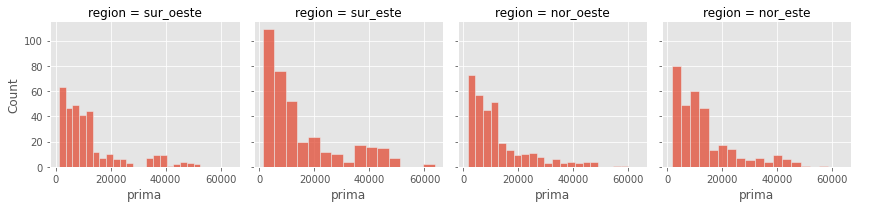

In [16]:
## Celda de código para probar.
g = sns.FacetGrid(df, col="region",)
g.map_dataframe(sns.histplot, x="prima",)
g.add_legend()
plt.show()

In [17]:
## Celda de código para probar.
df.groupby(by=["region"])["prima"].describe(percentiles=[0.1,0.25,0.50,0.75,0.90])

,count,mean,std,min,10%,25%,50%,75%,90%,max
region,,,,,,,,,,
nor_este,324.0,13406.384516,11255.803066,1694.7964,2745.869885,5194.322288,10057.652025,16687.3641,31211.999410,58571.07448
nor_oeste,325.0,12417.575374,11072.276928,1621.3402,2658.340820,4719.736550,8965.795750,14711.7438,28901.347712,60021.39897
sur_este,364.0,14735.411438,13971.098589,1121.8739,1983.187350,4440.886200,9294.131950,19526.2869,39827.016870,63770.42801
sur_oeste,325.0,12346.937377,11557.179101,1241.5650,2122.035600,4751.070000,8798.593000,13462.5200,34809.038400,52590.82939


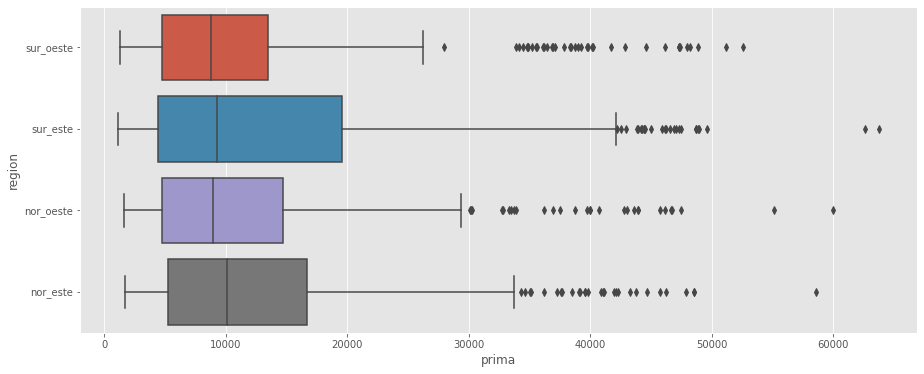

In [18]:
## Box-plot
plt.figure(figsize=(15,6))
sns.boxplot(data = df, x = "prima", y = "region")
plt.show()

Deje sus comentarios acá:

#### ***Ejercicio 4:***

Esta es una tabla del recuento de fumadores por región como proporción del número total de fumadores en el conjunto de datos. Genere una tabla similar a la siguiente y responda: ¿Por qué el `sur_este` tiene cargos más altos que las otras regiones?

| Region 	| Porcentaje de fumadores	|
|-	|-	|
| nor_oeste 	| 21% 	|
| nor_estest 	| 24% 	|
| sur_este 	  | 33% 	|
| sur_oeste 	| 21% 	|



**Respuesta.**

In [19]:
## Celda de código para probar.
nueva = df[mask]
nueva["region"].value_counts(normalize = True)*100

sur_este     33.211679
nor_este     24.452555
sur_oeste    21.167883
nor_oeste    21.167883
Name: region, dtype: float64

## ***Relaciones entre variables numéricas.***

Las propiedades de las variables individuales son importantes, pero no son lo único importante. Necesitamos el estudio de las relaciones entre múltiples variables. Una forma de dar un resumen numérico rápido de una relación entre dos variables es a través del concepto de **correlación**.

El **coeficiente de correlación de Pearson** (también llamado $R$ de Pearson) se usa comúnmente para este propósito y tiene valores en el rango $[-1,1]$. Una correlación positiva ($R > 0$) significa que a medida que una variable aumenta de valor, la tendencia común es que la otra variable aumenta de valor, mientras que una correlación negativa ($R < 0$) significa que a medida que una variable aumenta, la otras disminuciones. Si $R = 1$, eso significa que existe una relación lineal positiva perfecta entre las dos variables; si $R = -1$, existe una relación lineal negativa perfecta.

#### ***Ejercicio 5.***

Utilice `pandas` y el método `.corr()` para calcular una matriz de correlación para comparar las correlaciones entre variables para fumadores. Utilice esta matriz para identificar qué variables están positivamente correlacionadas, negativamente correlacionadas y no correlacionadas con los cargos. Considere dos matrices, una con toda la información y la otra solo con los valores del rango intercuartílico.

**Respuesta.** Una posibles solución es:

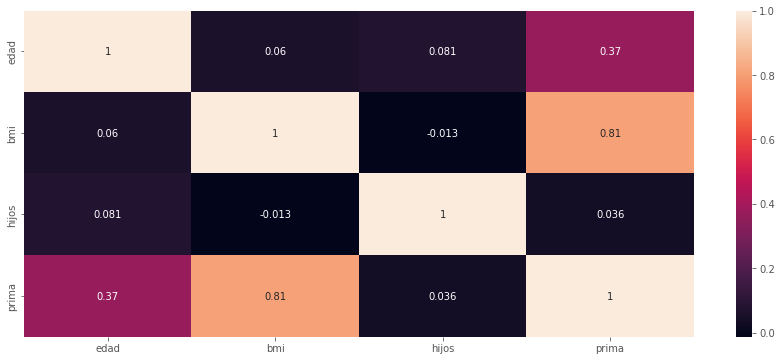

In [20]:
## Con toda la información
plt.figure(figsize = (15,6))
sns.heatmap(nueva.corr(), annot = True)
plt.show()

In [21]:
## DataFrame con solo los datos de fumadores y en el iqr de la feature "prima"
percen_75 = nueva["prima"]<nueva["prima"].quantile(q = 0.75)
percen_25 = nueva["prima"]>nueva["prima"].quantile(q = 0.25)
central = nueva[percen_25 & percen_75]

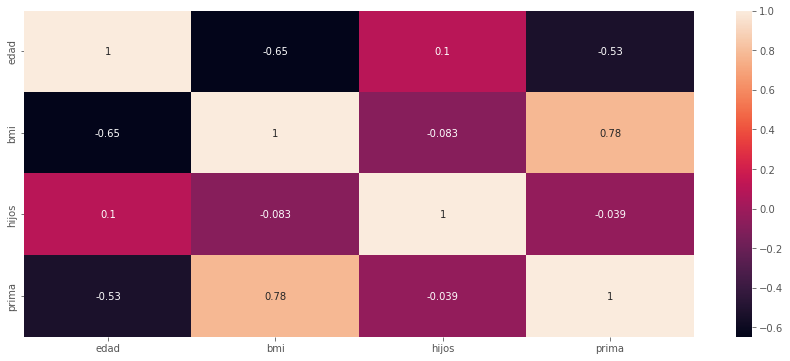

In [22]:
## Con toda la información
plt.figure(figsize = (15,6))
sns.heatmap(central.corr(), annot = True)
plt.show()

Podemos ver que prácticamente no existe correlación entre el número de hijos y las primas, lo que indica que no existe una relación lineal entre estas dos variables.

#### ***Ejercicio 6.***

Realice los scatterplots de `edad` vs `prima` y `BMI` vs `prima`. Explique qué significa cada uno de estos.



**Respuesta.** Una posible respuesta es.

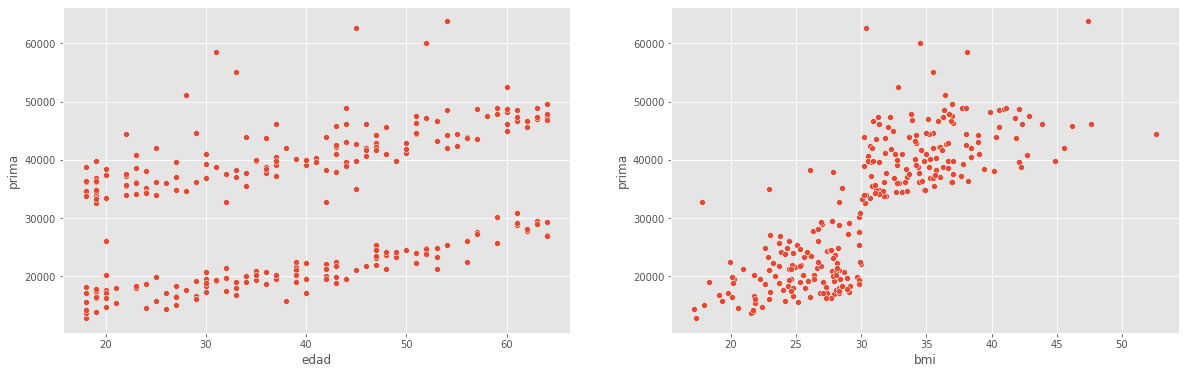

In [23]:
## Información completa de fumadores.
fig, ax= plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(data = nueva, x = "edad", y = "prima", ax = ax[0], )
sns.scatterplot(data = nueva, x = "bmi", y = "prima", ax = ax[1],)
plt.show()

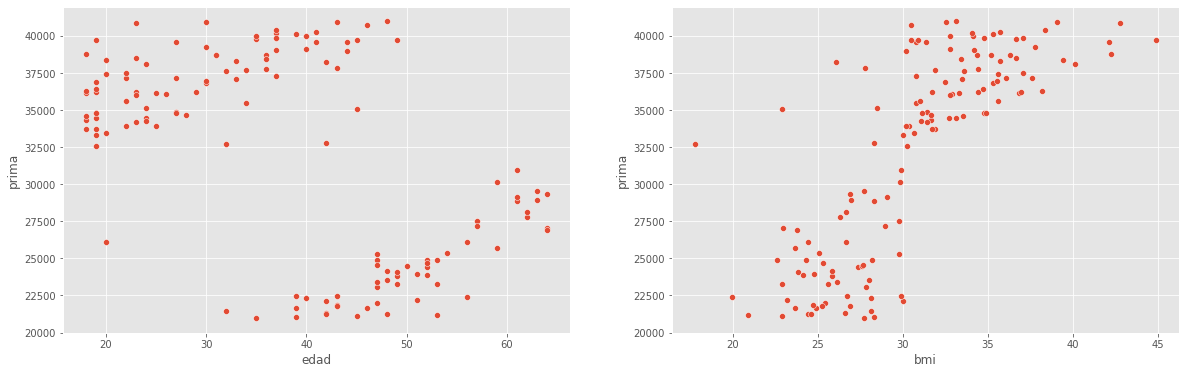

In [24]:
## Información completa de fumadores.
fig, ax= plt.subplots(1,2,figsize=(20,6))
sns.scatterplot(data = central, x = "edad", y = "prima", ax = ax[0], )
sns.scatterplot(data = central, x = "bmi", y = "prima", ax = ax[1],)
plt.show()

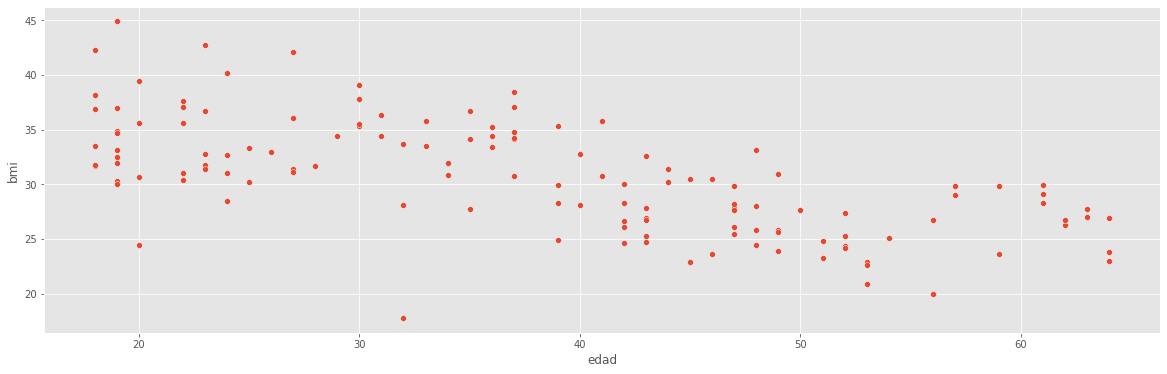

In [25]:
plt.figure(figsize=(20,6))
sns.scatterplot(data = central, x = "edad", y = "bmi",)
plt.show()

## ***Introduccion probabilidad.***


A menudo es necesario o útil calcular la **probabilidad** de que ocurra algún evento $A$, que toma un valor de 0 a 1 y se denota como $P(A)$. Una probabilidad de 0 significa que es seguro que un evento no ocurrirá, y una probabilidad de 1 significa que es seguro que ocurrirá. Para calcular la probabilidad de que ocurran los eventos, podemos usar las siguientes reglas (aquí, $A$ y $B$ son dos eventos):

1. $\displaystyle P(A) = \frac {\textrm{# de los resultados cuando } A \textrm{ ocurre}} {\textrm{# de los resultados totales}}$
2. $P(A \textrm{ AND } B) = P(A) * P(B)$ (solo se aplica a [eventos independientes](https://www.statisticshowto.com/probability-and-statistics/dependent-events-independent/))
3. $P(A \textrm{ OR } B) = P(A) + P(B)$ (solo se aplica a [eventos mutuamente excluyentes](https://en.wikipedia.org/wiki/Mutual_exclusivity))

#### ***Ejercicio 7.***

La compañía está considerando ofrecer un sorteo para dar cero cargos en la prima a un cliente durante el próximo mes. Quieren saber la probabilidad de que se seleccione a un fumador. Específicamente:

1. Si la empresa hizo un sorteo para cada región individualmente, ¿cuál es la probabilidad de que la persona seleccionada esta en la región que más se fuma sea fumadora?
2. Si la empresa hizo un sorteo para todas las regiones juntas, ¿cuál es la probabilidad de que se seleccione un fumador de la región que más fuma?

**Respuesta.** Una posible solución.

In [26]:
## Celda de código para probar.
se_smoker = df[df["region"]=="sur_este"]["fumador"].value_counts()
##
result = se_smoker.loc["si"]/sum(se_smoker)*100
print("La chance de que sea fumador del sur_este y gane el sorteo es: {:.2f}%".format(result))

La chance de que sea fumador del sur_este y gane el sorteo es: 25.00%


In [27]:
## Fumador de todas las regiones.
result1 = se_smoker.loc["si"]/df["fumador"].count()
print("""La chance de que sea fumador del sur_este y gane el sorteo con todas las 
regiones es: {:.2f}%""".format(result1*100))


La chance de que sea fumador del sur_este y gane el sorteo con todas las 
regiones es: 6.80%


## ***Teoría de probabilidades y distribuciones.***


Supongamos que tuviéramos que trazar la distribución de los `bmi` para los fumadores en nuestro conjunto de datos, eso nos daría un histograma. Pero un histograma se basa completamente en una muestra limitada de datos anteriores y no nos permite hacer predicciones directamente sobre la población general de fumadores, *independientemente de nuestro conjunto de datos específico*. Para hacer esto, necesitamos una **función de densidad de probabilidad (FDP)**, que es una construcción teórica que nos ayuda a calcular la probabilidad de dónde caería el `bmi` de cualquier fumador elegido al azar, y que no está estrictamente sujeta a los límites de nuestro dataset.

Tenga en cuenta que no dijimos que la FDP puede decirnos directamente la probabilidad de que el `bmi` de un fumador elegido al azar sea exactamente un valor dado; digamos, 30. La razón de esto es que el `bmi` es un valor *continuo* en lugar de un valor *discreto*; puede tomar cualquier valor decimal, por lo que la probabilidad de que el `bmi` de una persona sea *exactamente* 30 es prácticamente cero. Está prácticamente garantizado que lo que pensamos que es un `bmi` de 30 es en realidad un `bmi` de 29,99, o un `bmi` de 30,01, o incluso un `bmi` de 30,001. De cualquier manera, encontrar a una persona con un `bmi` de exactamente 30 es casi imposible.

### ***Área bajo la curva.***


Debido a esto, tiene más sentido calcular la probabilidad de que el `bmi` de un fumador se encuentre dentro de algún rango; digamos, entre 29 y 31. La FDP está perfectamente hecha para esto; específicamente, si trazamos la FDP en un plano de coordenadas bidimensional estándar (con un eje $x$ y un eje $y$), esta probabilidad es la área de la región que se encuentra debajo de la FDP y arriba de 0 (el eje $x$), con valores de $x$ entre 29 y 31. Esto no es otra cosa que el **área bajo la curva**.

Una consecuencia interesante de esta propiedad de la FDP es que el área total debajo de la FDP y sobre el eje $x$, sin límites sobre cuáles pueden ser los valores de $x$, tiene que ser 1 (porque la probabilidad de un evento tiene que estar entre 0 y 1).

Una de las distribuciones más famosas es la **distribución normal**, para la cual la media, la mediana y la moda son todas iguales y que es simétrica alrededor de la media. Esta distribución tiene un pico alto en el centro y disminuye a medida que avanzamos hacia los extremos izquierdo y derecho.

#### ***Ejercicio 7.***

Construya una aproximación de la función de densidad de la variable `bmi` para todos los fumadores.

A partir de esta gráfica y de los valores de la media, la mediana y la moda, explique si esta distribución es una buena candidata para ser perfectamente normal.

**Respuesta.** Una posible solución es:

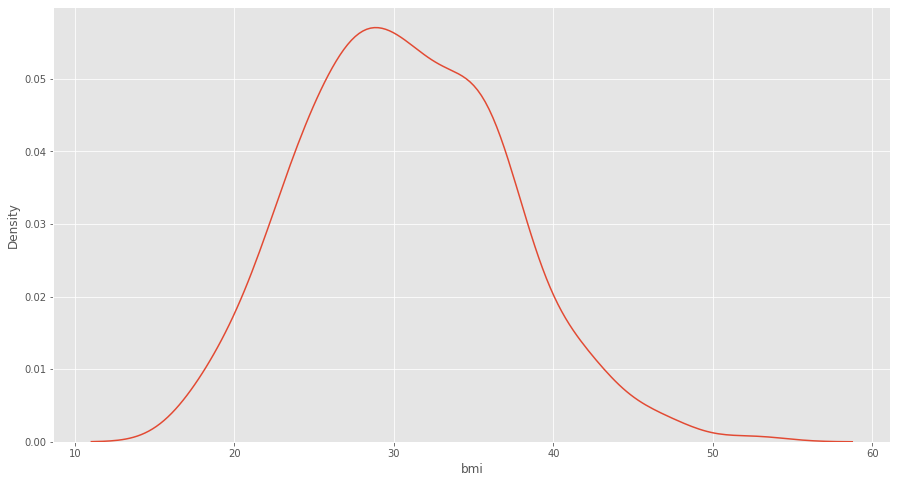

In [28]:
## Celda de código para probar.
plt.figure(figsize = (15,8))
sns.kdeplot(data = df[df["fumador"] == "si"], x = "bmi")
plt.show()

In [29]:
## Celda de código para probar.
print(df[df["fumador"] == "si"]["bmi"].mode()[0])
print(df[df["fumador"] == "si"]["bmi"].median())
print(df[df["fumador"] == "si"]["bmi"].mean())

28.31
30.447499999999998
30.70844890510949


Una distribución normal ideal se ve así:

<div align="center"><img src='https://raw.githubusercontent.com/lacamposm/Fundamentos_Analitica/main/images/normal.png' width=550>

Como puede ver, hay algunas líneas verticales superpuestas en la curva. Estos representan reglas generales que son *muy* útiles para recordar:

* Aproximadamente el 68% de las muestras en una distribución normal se encuentran dentro de una desviación estándar de la media
* Aproximadamente el 95% de las muestras se encuentran dentro de dos desviaciones estándar de la media
* Aproximadamente el 99,7% de las muestras se encuentran dentro de tres desviaciones estándar de la media

Es una práctica común referirse al número de desviaciones estándar de un punto de datos con respecto a la media como su puntuación **$z$**.

Relacionando esto con nuestra discusión sobre el área bajo la curva, las reglas generales anteriores se pueden interpretar como:

* El área bajo la FDP de distribución normal y por encima del eje $x$, con una puntuación $z$ entre -1 y 1, es de aproximadamente 0,68.
* El área bajo la FDP de distribución normal y por encima del eje $x$, con una puntuación $z$ entre -2 y 2, es de aproximadamente 0,95.
* El área bajo la FDP de distribución normal y por encima del eje $x$, con una puntuación $z$ entre -3 y 3 es de aproximadamente 0,997.

#### ***Ejercicio 8.***

Suponga por ahora que la distribución de los `bmi` es perfectamente normal. Calcula lo siguiente:

1. ¿Cuál es la probabilidad de que un fumador tenga un `bmi` superior a 30 (el umbral de la obesidad)?
2. ¿Cuál es la probabilidad de que un fumador tenga un `bmi` superior a 37?
3. ¿Qué rango de valores tiene una probabilidad del 5 % o menos de ser observado si toma una muestra aleatoria de una persona de esta distribución?

**Respuesta.** Una posible respuesta


In [30]:
## Celda de código para probar.

## ***Conclusiones.***

A partir del análisis, hemos visto que los fumadores pagan tarifas sustancialmente más altas que los no fumadores. Las tarifas para fumadores también están fuertemente correlacionadas con el `bmi`, particularmente por encima del umbral de la obesidad. Parece que el tabaquismo es más común en hombres que en mujeres y que es particularmente prevalente en la región `sur_este`, lo que podría explicar la prima con la media más alta en esa región.

## ***Comentarios***

En esta lectura, se observó que podemos analizar datos históricos para comprender las tendencias dentro de ellos y usar esas tendencias y algunos conocimientos teóricos de probabilidad y estadísticas para predecir la probabilidad de eventos futuros. Note además que:

1. Las estadísticas de resumen se pueden usar para indicar rápidamente dónde está el "centro" de un conjunto de datos o qué tan disperso está el conjunto de datos.

2. Podemos investigar correlaciones entre variables. Esto es especialmente útil durante el análisis exploratorio de datos y cuando se construyen modelos que predicen el valor de una variable de interés en función de varias otras.

3. La función de densidad de probabilidad es lo que nos permite pasar del mundo totalmente empírico de los histogramas, que son una representación imperfecta y limitada de toda la población a modelar e inferir características de esa población. El área debajo de la FDP y arriba de 0 entre dos valores específicos de $x$, $a$ y $b$, da la probabilidad de que una muestra elegida al azar de esa población tenga un valor de $x$ para esa variable entre $a$ y $b$.

4. La distribución normal es una FDP particularmente especial que es perfectamente simétrica y con su media, mediana y moda iguales, y se ajusta bastante bien a muchos fenómenos naturales.